In [2]:
from recidiviz.calculator.modeling.population_projection.super_simulation.super_simulation_factory import SuperSimulationFactory
from recidiviz.calculator.modeling.population_projection.transition_table import TransitionTable
from recidiviz.calculator.modeling.population_projection.spark_policy import SparkPolicy
import pandas as pd
from functools import partial
import yaml
%config Completer.use_jedi = False

outflows_data returned 96 results
transitions_data returned 198 results
total_population_data returned 0 results
initialization time:  5.57590126991272
simulation_time:  7.222745180130005
initialization time:  5.660873889923096
simulation_time:  7.298573017120361
initialization time:  5.768054008483887
simulation_time:  7.393872976303101


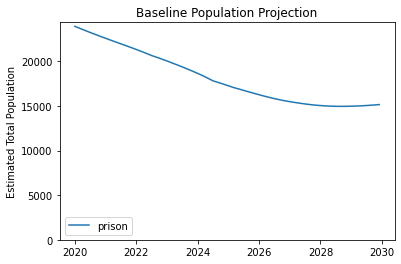

In [4]:
path_from_state_folder = 'FED/federal_prison_model_inputs.yaml'
display_compartments = ['prison']
test_sim = SuperSimulationFactory.build_super_simulation('../state/' + path_from_state_folder)
test_sim.simulate_baseline(display_compartments)

initialization time:  6.833798885345459
initialization time:  6.183797121047974
simulation_time:  7.8541083335876465
simulation_time:  8.391791820526123


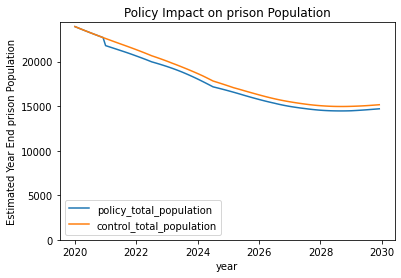

In [13]:
# test_sim = SuperSimulationFactory.build_super_simulation('../state/WI/WI_prison_model_inputs.yaml')

# Policy Option Methods
powder_transitions = test_sim.initializer.data_dict['transitions_data']
powder_transitions = powder_transitions[(powder_transitions.compartment == 'prison')
                                        & (powder_transitions.crime_type == 'powder')]


def remove_sentencing_disparities(retroactive=False):
    return partial(TransitionTable.use_alternate_transitions_data, 
                   alternate_historical_transitions=powder_transitions,
                   retroactive=retroactive)

policy_list_non_retroactive = [
    SparkPolicy(policy_fn=remove_sentencing_disparities(True),
                spark_compartment='prison',
                sub_population={'crime_type': 'crack'},
                policy_ts=48,
                apply_retroactive=True)
]
    
test_results = test_sim.simulate_policy(policy_list_non_retroactive, 'prison')

In [14]:
test_sim.upload_policy_simulation_results_to_bq('federal_prison_retro')

{'spending_diff':                        prison release release_full
 year                                              
 2020.000000               0.0     0.0          0.0
 2020.083333               0.0     0.0          0.0
 2020.166667               0.0     0.0          0.0
 2020.250000               0.0     0.0          0.0
 2020.333333               0.0     0.0          0.0
 ...                       ...     ...          ...
 2029.583333  179026436.139282     0.0          0.0
 2029.666667  180406321.393974     0.0          0.0
 2029.750000  181781655.167447     0.0          0.0
 2029.833333  183154541.909399     0.0          0.0
 2029.916667  184526893.840617     0.0          0.0
 
 [120 rows x 3 columns],
 'compartment_life_years_diff':                   prison      release release_full
 year                                              
 2020.000000          0.0          0.0          0.0
 2020.083333          0.0          0.0          0.0
 2020.166667          0.0          0.0   